# Shopify Summer 2022 Data Science Intern Challenge    - V. Vamsi

## Question1 :
### Given some sample data, write a program to answer the following: [click here](https://docs.google.com/spreadsheets/d/16i38oonuX1y1g7C_UAmiK9GkY7cS-64DfiDMNiR41LM/edit#gid=0) to access the required data set

### On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

### a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
### b. What metric would you report for this dataset?
### c. What is its value?


##                                                           Solution:-

In [11]:
#Importing the necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
#Loading the data
raw_data = pd.read_csv('./datasets/2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')

In [14]:
raw_data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [15]:
raw_data.shape

(5000, 7)

In [24]:
obtained_aov = sum(raw_data['order_amount']) / raw_data.order_amount.count()   #or -> df.order_amount.mean()
print('Naively calculated AOV = {}'.format(obtained_aov))

Naively calculated AOV = 3145.128


In [21]:
df.isna().count()

order_id          5000
shop_id           5000
user_id           5000
order_amount      5000
total_items       5000
payment_method    5000
created_at        5000
dtype: int64

#### No null values present in the dataset

In [9]:
len(df['shop_id'].unique())

100

### Concluding there are 100 unique shops in the provided data

In [13]:
df[df['order_amount'] == 704000]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00


### You can see that shop id 42 contains more peculiar behaviour. This may be because of many reasons like festive sale or family sale etc.,

In [27]:
raw_data.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


### You can check out more details here like -> mean (AOV) =$3145.128, minimum order amount =$90, maximum oder amount =$704000

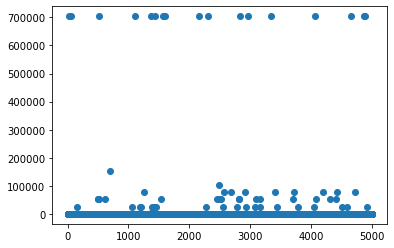

In [29]:
#Lets see the data more clearly
plt.scatter(raw_data['order_id'],raw_data['order_amount'])

In [30]:
import scipy.stats as stats
Q1 = raw_data.order_amount.quantile(q=.25)
Q3 = raw_data.order_amount.quantile(q=.75)
IQR = raw_data.order_amount.apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
data_cleaned = raw_data[~((raw_data.order_amount < (Q1-1.5*IQR)) | (raw_data.order_amount > (Q3+1.5*IQR)))]
data_cleaned

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
7,8,22,761,292,2,cash,2017-03-08 2:05:38
8,9,64,914,266,2,debit,2017-03-17 20:56:50
10,11,66,848,322,2,credit_card,2017-03-26 23:36:40
11,12,40,983,322,2,debit,2017-03-12 17:58:30
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


In [36]:
data_cleaned.shape

(2537, 7)

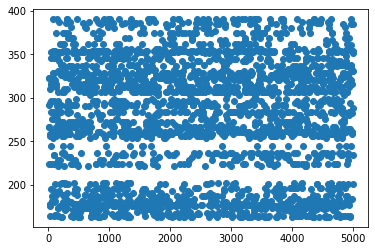

In [31]:
#Plot the data for our confirmation whether the data is cleaned or not like outliers removed or not!
plt.scatter(data_cleaned.order_id, data_cleaned.order_amount)

In [32]:
data_cleaned.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000
mean,2505.057154,49.449350,848.927079,275.181317,1.838392
std,1454.856289,28.904701,87.869220,67.901112,0.534216
min,1.000000,1.000000,700.000000,163.000000,1.000000
25%,1226.000000,25.000000,772.000000,222.000000,2.000000
50%,2517.000000,49.000000,848.000000,284.000000,2.000000
75%,3754.000000,74.000000,925.000000,328.000000,2.000000
max,5000.000000,100.000000,999.000000,390.000000,4.000000


### After loosing some data, we can say that mean(AOV) as 275 and max order amount as 390
### But this is not fair as , the customers who bought more items are not our customers , we can't say this right?

### So removing data is really bad idea. The idea is to see the distribution, then decide which metric to use.
### We can say that our data contains too many exteriors or outliers which causing the wrong AOV. We already know the mean move the side of the exteriors but median cannot!

# Conclusion: 

## SO instead of using mean as our metric , for this simple data, we can use median as our metric as this value will apt the data mostly.

## a. You have naively calculated the AOV without checking any outliers or exteriors persent in our data or not? and without even looking how the data is skewed? And yes To evaluate any data, we first look out the outliers and distribution of the data!

## b. Median is the simplest metric i would prefer for this dataset!

## [Optional] We can also use quantile method and z-score as our metrics but that may complicate the process. 
## We can also calculate average of each shop's AOV but this is not necessary for now!

## c. The value of the AOV by using meadian as a metric is $284 which seems perfect for this data

# 


# Question2 : 

### For this question you’ll need to use SQL. Follow this [link](https://www.w3schools.com/SQL/TRYSQL.ASP?FILENAME=TRYSQL_SELECT_ALL) to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

### a. How many orders were shipped by Speedy Express in total?
### b. What is the last name of the employee with the most orders?
### c. What product was ordered the most by customers in Germany?


# Solution:

## a. How many orders were shipped by Speedy Express in total?
#### SELECT COUNT (*) 
#### FROM Orders, Shippers 
#### WHERE Orders.ShipperID=Shippers.ShipperID AND Shippers.ShipperName='Speedy Express'

## Answer : 54

## b. What is the last name of the employee with the most orders?
#### SELECT Employees.LastName, COUNT (*) AS Total
#### FROM Orders, Employees
#### WHERE Orders.EmployeeID = Employees.EmployeeID
#### GROUP BY Employees.LastName
#### ORDER BY Total Desc
#### LIMIT 1

## Answer: Peacock (40 orders)

## c. What product was ordered the most by customers in Germany?
#### SELECT Products.ProductName, Products.ProductID, SUM(OrderDetails.Quantity) AS Total
#### FROM Orders, OrderDetails, Customers, Products
#### WHERE Orders.OrderID=OrderDetails.OrderID AND OrderDetails.ProductID=Products.ProductID AND Customers.Country='Germany' AND Customers.CustomerID=Orders.CustomerID
#### GROUP BY Products.ProductName
#### ORDER BY Total DESC
#### LIMIT 1

## Answer: Boston Crab Meat (Total Quantity of 160 and ProductID of 40)

# Thank You !!!